In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [6]:
def plot_verticles(vertices, isosurf = False, filename = None):
    # Create a new plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    z = [v[2] for v in vertices]    
    if isosurf:
        ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    else:
        ax.scatter(x, y, z, c='r', marker='o')    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # Show or save the plot
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)


def plot_mesh(
    your_mesh, 
    size_x=10, 
    size_y=10, 
    dpi=80, 
    filename = None
    ):
    # Create a new plot
    figure = plt.figure(figsize=(size_x, size_y), dpi=dpi)
    #axes = mplot3d.Axes3D(figure, auto_add_to_figure=False)
    axes = mplot3d.Axes3D(figure)
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors, edgecolor="black"))
    figure.add_axes(axes)
    # Auto scale to the mesh size
    scale = your_mesh.points.flatten()
    axes.auto_scale_xyz(scale, scale, scale)
    # Show or save the plot
    if filename is None:
        plt.show()
    else:
        #matplotlib.use('Agg')
        plt.savefig(filename)

In [7]:
def plot_verticles2D(vertices, filename = None, color = 'r', title = ''):
    # Create a new plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    
    ax.scatter(x, y, c=color, marker='o')    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Show or save the plot
    if filename is None:
        plt.grid()
        plt.show()
    else:
        plt.savefig(filename)


def plot_verticles(vertices, isosurf = False, filename = None, color = 'r', title = ''):
    # Create a new plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    z = [v[2] for v in vertices] 
    print(x)   
    if isosurf:
        ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    else:
        ax.scatter(x, y, z, c=color, marker='o')    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # Show or save the plot
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)

129.9038105676658
[[ 0.81649658 -0.57735027  0.         15.        ]
 [ 0.33333333  0.47140452 -0.81649658 15.        ]
 [ 0.47140452  0.66666667  0.57735027 15.        ]
 [ 0.          0.          0.          1.        ]]
.. [[0.]
 [0.]
 [0.]
 [1.]]
[[  0.81649658   0.33333333   0.47140452 -24.31851653]
 [ -0.57735027   0.47140452   0.66666667  -8.41081377]
 [  0.          -0.81649658   0.57735027   3.58719468]
 [  0.           0.           0.           1.        ]]
[[ 15.         -24.31851653   0.        ]
 [ 15.          -8.41081377   0.        ]
 [ 15.           3.58719468   0.        ]
 [  1.           1.           1.        ]]
[15.0, -24.318516525781366, 0.0]


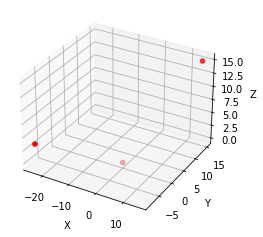

[[39.49489743 25.         29.14213562  1.        ]
 [-2.32050808 29.14213562 35.          1.        ]
 [15.         -9.49489743 32.32050808  1.        ]]


In [8]:
pi = np.pi


px=0.04
py=0.04
#Коорд перемещения 1 камеры отн шаблона#  
xc1=15 #день
yc1=15#месяц
zc1=15#год
 
#Внутренние параметры камер####
f=3#фокус px
cx=5000 #принцип.точка   центр изображения по Ох
cy=5000 #принцип.точка   центр изображения по Оy
##############
alf=pi/6
xlime=f/(np.tan(alf)*0.04)
print(xlime)
V=(15,15,15,1)#варик др месяц
ax= np.pi/2-np.arctan((V[2]/((V[0]**2+V[1]**2)**0.5)))
az= np.arctan(V[0]/((V[0]**2+V[1]**2)**0.5))
Rx=np.array([[1,0,0],
    [0, np.cos(ax),-np.sin(ax)],
    [0,np.sin(ax),np.cos(ax)]])
Rz=np.array([[np.cos(az),-np.sin(az),0],
    [np.sin(az),np.cos(az),0],
    [0,0,1]])
T=np.array([[xc1,
   yc1,
   zc1]]).T
 
R=Rx.dot(Rz)
 
O=np.zeros((1,3));
 
####
C1 = np.zeros((4,4))
C1[:3,:3]=R
C1[:3,3:4] =  T
C1[3,3] = 1.
#C1=[R T;O 1];(Коор. в системе камеры)*С'=(коорд. отн шаблона)    
##матрица внешней калибровки Сс=inv(C)
print(C1)
Cc1 = np.zeros((4,4))
Cc1[:3,:3]=R.T
Cc1[:3,3:4] =  -(R.T.dot(T))
Cc1[3,3] = 1.

#Cc1=[R' -R'*T;O 1];
#(Коор. в системе шаблона)*Сс'=(коорд. отн камеры)
####
 
 
 
##Матрица внутренней калибровки##
K=np.array([[f, 0, cx],
   [0, f, cy],
   [0, 0 , 1]])
#############
 
##Матрицы проекции###
I = np.hstack((np.eye(3),np.zeros((3,1))) )
Pr1=np.dot(K.dot(I),Cc1)
#########
 
#Проверка полученных матриц#
 
# C2=[0 0 0 1]*C1'
############
 
#ШАБЛОН - МИРОВАЯ СИСТЕМА КООРДИНАТ
 
###########
 
#axes = mplot3d.Axes3D(figure, auto_add_to_figure=False)

#Построение#

 
#положение камер отн шаблона#
Oc_ = np.array([[xc1],[yc1],[zc1],[1]])
Oc_0 = np.array([[0, 0, 0, 1]]).T 
print('..',np.dot(Cc1,Oc_)) 
Oc=np.dot(Cc1,Oc_0)
print(Cc1)#первод из мировой  в видовую
#перевод из видовой в мировую
vertices_ = np.hstack((Oc_,Oc,Oc_0))
print(vertices_ )
plot_verticles(vertices_[:3,:].T, isosurf = False, filename = None) 
 
#орты базиса мировой системы координат
OrtX=np.array([[30, 0, 0, 1],[0, 30, 0, 1],[0, 0, 30, 1]])
#орты базиса камеры отн мировой системы координат
OrtXc=OrtX.dot(C1.T)
print(OrtXc) 
 
#plt.plot3D([OrtXc(1) Oc(1)],[OrtXc(2) Oc(2)],[OrtXc(3) Oc(3)],'r','LineWidth',3)
#plt.plot3D([OrtYc(1) Oc(1)],[OrtYc(2) Oc(2)],[OrtYc(3) Oc(3)],'g','LineWidth',3)
#plt.plot3D([OrtZc(1) Oc(1)],[OrtZc(2) Oc(2)],[OrtZc(3) Oc(3)],'b','LineWidth',3)
 


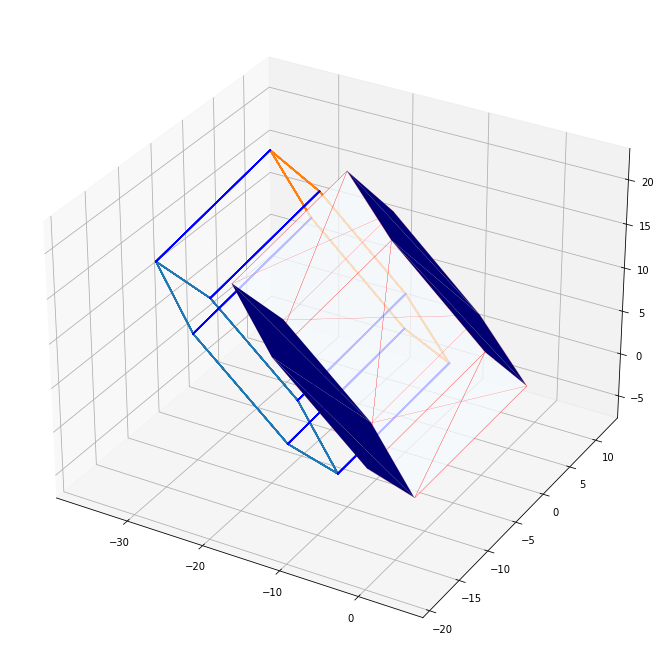

In [32]:
from matplotlib.colors import LightSource
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection="3d")
alf = 60/180*np.pi#  угол между соседними точками окружности
r = 15 # circle radius 
Rz=[[np.cos(alf), np.sin(alf), 0,0],[-np.sin(alf),  np.cos(alf), 0,0],[0, 0, 1,0],[0,0,0,1]]
Rx=np.array([[1, 0, 0,0],[0, np.cos(alf), np.sin(alf),0],[0, -np.sin(alf), np.cos(alf),0],[0,0,0,1]])
P0 = [0,0, r,1]
p0 = [r ,0, 0,1]
P=[p0]
Tp = np.array([[1, 0, 0,0],[0 ,1 ,0,0],[0,0,1,0],[ P0[0],P0[1],P0[2] , 1]])
Pr=P
L=[]
for  n in np.linspace( 0,360, 360 // 10):
    P += [np.dot(P[-1][:],Rz).tolist()]
    
P=np.array(P)
P_new=P.dot(Tp)

P = np.dot(P,Cc1.T)
P_new=np.dot(P_new,Cc1.T)
ax.plot3D(P[:,0],P[:,1],P[:,2])
ax.plot3D(P_new[:,0],P_new[:,1],P_new[:,2])
for i in range(30):
    ax.plot3D([P[i,0],P_new[i,0]],[P[i,1],P_new[i,1]],[P[i,2], P_new[i,2]],'b')

L=[]
for i in range(12):
    ax.plot3D([P[i,0], P_new[i,0]],[P[i,1],P_new[i,1]],[P[i,2],P_new[i,2]],'b')
    L+=[P[i,:]]
    L+=[P_new[i,:]]
L+=[P[0,:]]
L+=[P_new[0,:]]
Pr2=np.array(L)
my_cmap = plt.get_cmap('Blues')
for i in range(12):
    
    ax.plot_trisurf(Pr2[i:(i+3),0]+10,Pr2[i:(i+3),1],Pr2[i:(i+3),2],cmap = my_cmap ,  linewidth = 0.2,
                         antialiased = True, edgecolor = 'red', shade=True ,alpha=0.5)# цвет+прозрачность alpha = 1 (не прозрачно)
ax.plot_trisurf(P[:,0]+10,P[:,1],P[:,2],color='b', alpha=1)
ax.plot_trisurf(P_new[:,0]+10,P_new[:,1],P_new[:,2],color='b', alpha=1 )

plt.show()